Author: Elizabeth Luong

Date: 29 January 2025

## Q1


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

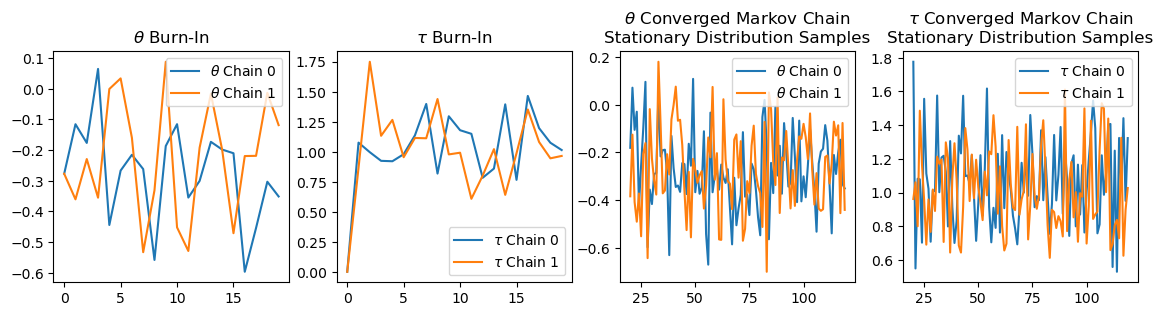

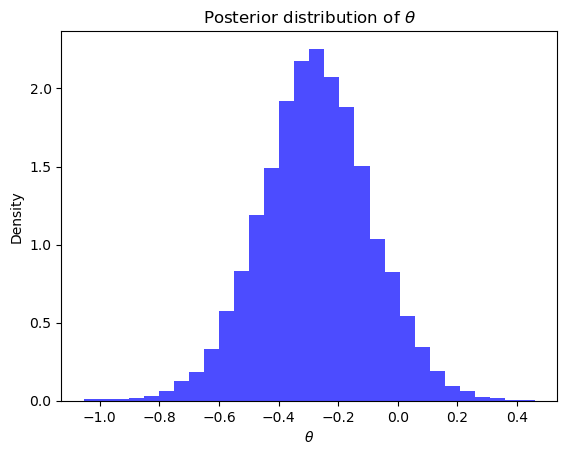

95% credible interval for θ: [-0.63807653  0.09384654]


In [6]:
def gibbs_sampler(n, m, s, C=2, G=10000, burn_in=20):
    x = stats.norm(loc=m, scale=s).rvs(size=n)
    theta, tau = np.zeros([C, G]), np.zeros([C, G])
    theta[:, 0] = np.mean(x)  
    for c in range(C):
        for g in range(1, G):
            shape = n / 2 + 1
            rate = 0.5 * np.sum((x - theta[c, g-1])**2)
            tau[c, g] = stats.gamma(a=shape, scale=1/rate).rvs()

            mean_posterior = np.mean(x)
            std_posterior = (1 / (tau[c, g] * n))**0.5
            theta[c, g] = stats.norm(loc=mean_posterior, scale=std_posterior).rvs()
    
    fig, ax = plt.subplots(1, 4, figsize=(14, 3))
    ax[0].set_title("$\\theta$ Burn-In")
    ax[1].set_title("$\\tau$ Burn-In")
    ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
    ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

    demo = 120
    for c in range(C):
        ax[0].plot(theta[c, :burn_in], label="$\\theta$ Chain " + str(c))
        ax[1].plot(tau[c, :burn_in], label="$\\tau$ Chain " + str(c))
        ax[2].plot(np.arange(burn_in, demo, dtype=int), theta[c, burn_in:demo], label="$\\theta$ Chain " + str(c))
        ax[3].plot(np.arange(burn_in, demo, dtype=int), tau[c, burn_in:demo], label="$\\tau$ Chain " + str(c))

    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[3].legend()
    plt.show()
    
    plt.hist(theta[0, burn_in:], bins=30, density=True, alpha=0.7, color='blue')
    plt.title("Posterior distribution of $\\theta$")
    plt.xlabel("$\\theta$")
    plt.ylabel("Density")
    plt.show()

    # 95% credible interval for theta
    credible_interval = np.quantile(theta[0, burn_in:], [0.025, 0.975])
    print(f"95% credible interval for θ: {credible_interval}")

# Example demonstration of the Gibbs sampler with arbitrary values
gibbs_sampler(n=30, m=0, s=1)

## Q2

Derive the Full Conditional Distributions $p(\tau \mid \theta, \mathbf{x})$ and $p(\theta \mid \tau, \mathbf{x})$ given:

- $p(\theta) = N(\theta_0, \tau_0)$
- $p(\tau) \propto \tau^{\frac{\alpha}{2} -1} e^{-\frac{\lambda}{2}\tau}$
- $\tau = \frac{1}{\sigma^2}$

Full Conditional Distribution for $\mathbf{p(\tau \mid \theta, \mathbf{x})}$

Using Bayes' theorem we have: 
$$p(\tau \mid \theta, \mathbf{x}) \propto p(\mathbf{x} \mid \theta, \tau) p(\tau)$$

Since $x_i \sim N(\theta, \tau^{-1})$, where $\tau = \frac{1}{\sigma^2}$ is ths inverse variance (assuming iid normal observations), the likelihood function is the product of the individual densities:

Substituting the normal density:
$$p(\mathbf{x} \mid\theta,\tau) = \prod_{i=1}^n p(x_i\mid\theta, \tau)$$

$$p(\mathbf{x} \mid\theta, \tau) = \prod_{i=1}^n \sqrt{\frac{\tau}{2 \pi}} e^{-\frac{\tau}{2} (x_i-\theta)^2}$$

$$p(\mathbf{x} \mid\theta, \tau) = (\frac{\tau}{2\pi})^{\frac{n}{2}} e^{-\frac{\tau}{2}\sum_{i=1}^n (x_i-\theta)^2}$$

The likelihood function is:

$$p(\mathbf{x} \mid \theta, \tau) \propto \tau^{\frac{n}{2}} e^{-\frac{\tau}{2} \sum_{i=1}^{n} (x_i - \theta)^2}$$

Multiplying the prior for $\tau$: 
$$p(\tau) \propto \tau^{\frac{\alpha}{2} - 1} e^{-\frac{\lambda}{2} \tau}$$

The full conditional posterior for $\tau$ is proportional to the likelihood times the prior:
$$p(\tau \mid \theta, \mathbf{x}) \propto  \tau^{\frac{n}{2}} e^{-\frac{\tau}{2} \sum_{i=1}^{n} (x_i - \theta)^2} \cdot \tau^{\frac{\alpha}{2}-1} e^{-\frac{\lambda}{2}\tau}$$

$$\propto \tau^{\frac{n+\alpha}{2} - 1} e^{-\frac{\tau}{2} (\sum_{i=1}^{n} (x_i - \theta)^2 + \lambda)}$$

We recognize this as the kernal of a Gamma distribution:
$$\tau \mid \theta, \mathbf{x} \sim \text{Gamma} \left( \frac{n + \alpha}{2}, \frac{1}{2} \left[\sum_{i=1}^{n} (x_i - \theta)^2 + \lambda \right] \right)$$


Now for the Full Conditional Distribution for $\mathbf{p(\theta \mid \tau, \mathbf{x})}$

Also using Bayes' theorem: 
$$p(\theta \mid \tau, \mathbf{x}) \propto p(\mathbf{x} \mid \theta, \tau) p(\theta)$$

Likelihood function:
$$p(\mathbf{x} \mid \theta, \tau) \propto e^{ -\frac{\tau}{2} \sum_{i=1}^{n} (x_i - \theta)^2}$$

Prior for $\theta$:
$$p(\theta) = N(\theta_0, \tau_0) \propto e^{-\frac{1}{2\tau_0} (\theta - \theta_0)^2 }$$

Multiplying the likelihood and prior:
$$p(\theta \mid \tau, \mathbf{x}) \propto e^{ -\frac{\tau}{2} \sum_{i=1}^{n} (x_i - \theta)^2 } \cdot e^{-\frac{1}{2\tau_0} (\theta - \theta_0)^2}$$

Expanding terms:
$$\propto e^{-\frac{\tau}{2} [n\theta^2 -2\theta \sum_{i=1}^n x_i] - \frac{1}{2\tau_0} (\theta^2 - 2\theta\theta_0)}$$

$$\propto e^{-\frac{1}{2} (n\tau + \frac{1}{\tau_0})\theta^2 + (\tau n \bar{x} + \frac{\theta_0}{\tau_0})\theta}$$

We recognize this as the kernal of a Normal distribution:
$$\theta \mid \tau, \mathbf{x} \sim N ( \frac{n\tau \bar{x} + \frac{\theta_0}{\tau_0}}{n\tau + \frac{1}{\tau_0}}, \frac{1}{n\tau + \frac{1}{\tau_0}})$$

#### Equating $\alpha$ and $\lambda$

The hyperparameters $\alpha$ and $\lambda$ in the prior distribution of the precision $\tau$ control the influence of prior information on the posterior. Specifically, $\alpha$ can be interpreted as the prior equivalent of the number of observations, determining how strongly the prior belief affects the final inference. A larger $\alpha$ implies greater confidence in the prior, parallel to having more data points from prior knowledge. Similarly, $\lambda$ represents the prior's contribution to the sum of squared deviations, influencing the scale or spread of the precision. If $\lambda$ is large, it suggests the prior belief that the variance is small, tightening the posterior around the prior mean. Overall, $\alpha$ and $\lambda$ balance the contribution of prior knowledge against the actual data, with smaller values allowing the likelihood to dominate and larger values emphasizing prior assumptions.







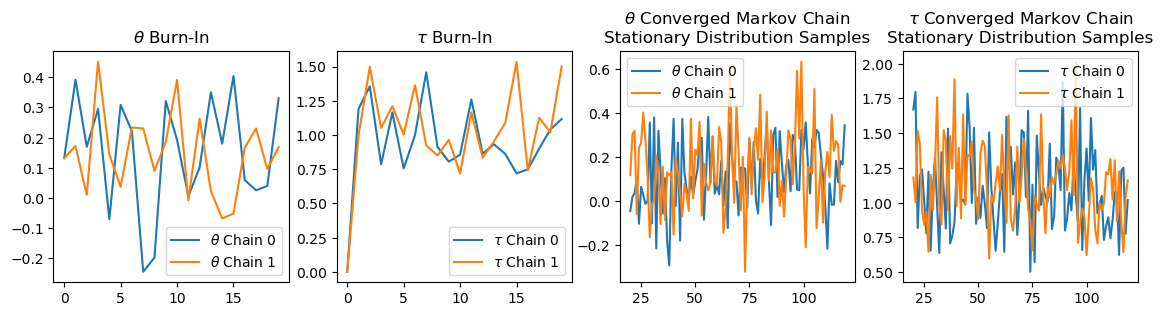

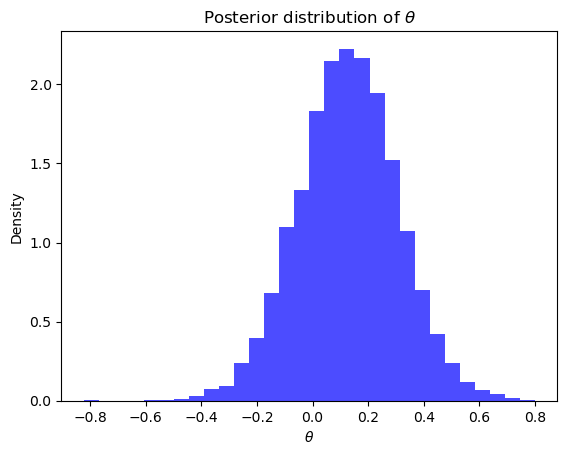

95% credible interval for θ: [-0.2250917   0.47862794]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def gibbs_sampler(n, m, s, theta_0=0, tau_0=1, alpha=2, lambd=2, C=2, G=10000, burn_in=20):
    """
    Gibbs sampler for Normal-Gamma model with:
        - θ ~ N(θ_0, τ_0)
        - τ ~ Gamma(shape=α/2, rate=λ/2)
    
    Parameters:
        n         : Number of data points
        m         : True mean of data generation
        s         : True standard deviation of data generation
        theta_0   : Prior mean for θ
        tau_0     : Prior std deviation for θ
        alpha     : Prior shape parameter for τ
        lambd     : Prior rate parameter for τ
        C         : Number of Markov chains
        G         : Number of Gibbs sampling iterations
        burn_in   : Number of initial samples to discard (burn-in)
    """

    x = stats.norm(loc=m, scale=s).rvs(size=n)

    theta, tau = np.zeros([C, G]), np.zeros([C, G])
    theta[:, 0] = np.mean(x)  
    
    for c in range(C):
        for g in range(1, G):
            shape = (n + alpha) / 2
            rate = 0.5 * np.sum((x - theta[c, g-1])**2) + lambd / 2
            tau[c, g] = stats.gamma(a=shape, scale=1/rate).rvs()

            mean_posterior = (n * np.mean(x) + theta_0 / tau_0) / (n + 1 / tau_0)
            std_posterior = (1 / (tau[c, g] * (n + 1 / tau_0)))**0.5
            theta[c, g] = stats.norm(loc=mean_posterior, scale=std_posterior).rvs()
    
    fig, ax = plt.subplots(1, 4, figsize=(14, 3))
    ax[0].set_title("$\\theta$ Burn-In")
    ax[1].set_title("$\\tau$ Burn-In")
    ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
    ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

    demo = 120
    for c in range(C):
        ax[0].plot(theta[c, :burn_in], label="$\\theta$ Chain " + str(c))
        ax[1].plot(tau[c, :burn_in], label="$\\tau$ Chain " + str(c))
        ax[2].plot(np.arange(burn_in, demo, dtype=int), theta[c, burn_in:demo], label="$\\theta$ Chain " + str(c))
        ax[3].plot(np.arange(burn_in, demo, dtype=int), tau[c, burn_in:demo], label="$\\tau$ Chain " + str(c))

    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[3].legend()
    plt.show()

    plt.hist(theta[0, burn_in:], bins=30, density=True, alpha=0.7, color='blue')
    plt.title("Posterior distribution of $\\theta$")
    plt.xlabel("$\\theta$")
    plt.ylabel("Density")
    plt.show()

    # 95% credible interval for theta
    credible_interval = np.quantile(theta[0, burn_in:], [0.025, 0.975])
    print(f"95% credible interval for θ: {credible_interval}")

# Example demonstration of the Gibbs sampler with priors
gibbs_sampler(n=30, m=0, s=1, theta_0=0, tau_0=1, alpha=2, lambd=2)


To demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood, we will modify the Gibbs sampler to explore different hyperparameter settings and compare their impact on the posterior distributions of $\theta$ and $\tau$.

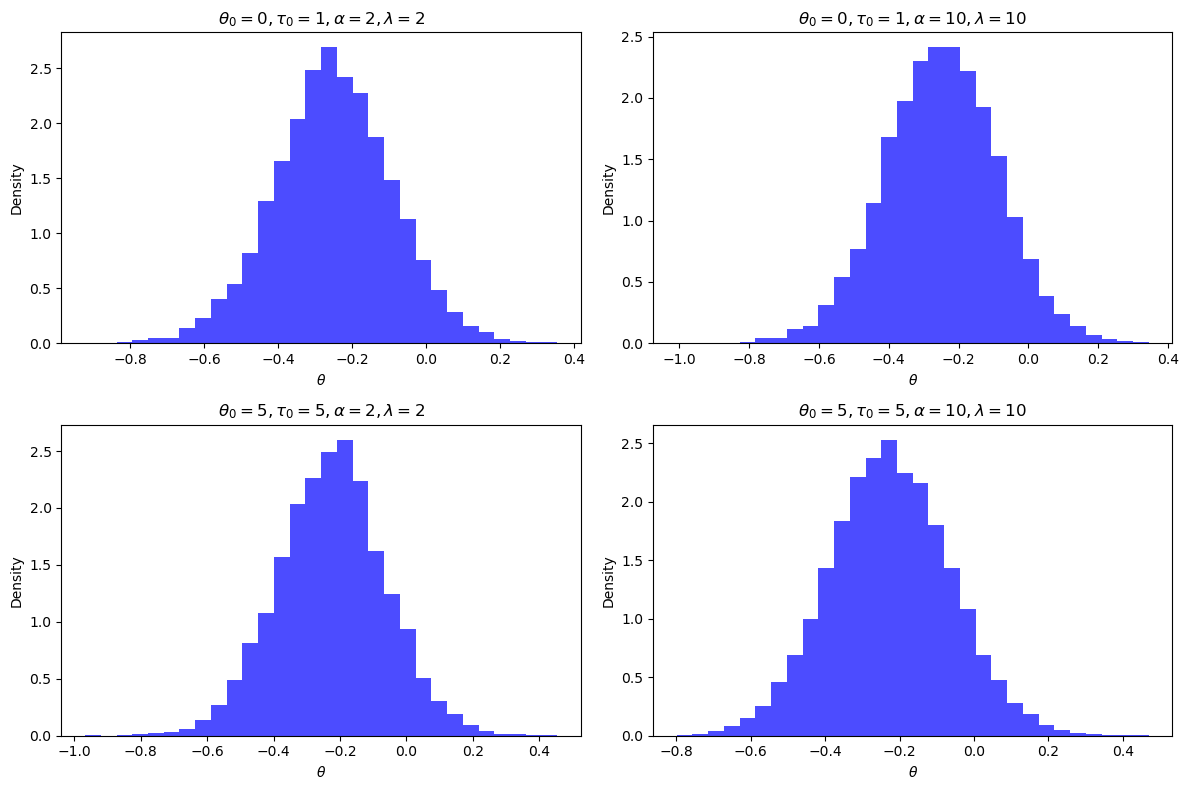

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def gibbs_sampler_with_priors(n, m, s, theta_0_list, tau_0_list, alpha_list, lambd_list, C=2, G=10000, burn_in=500):
    """
    Gibbs sampler for Normal-Gamma model with different prior hyperparameters to analyze their effect.
    
    Parameters:
        n          : Number of data points
        m          : True mean of data generation
        s          : True standard deviation of data generation
        theta_0_list : List of prior means for θ
        tau_0_list   : List of prior std deviations for θ
        alpha_list   : List of prior shape parameters for τ
        lambd_list   : List of prior rate parameters for τ
        C          : Number of Markov chains
        G          : Number of Gibbs sampling iterations
        burn_in    : Number of initial samples to discard (burn-in)
    """

    x = stats.norm(loc=m, scale=s).rvs(size=n) 

    fig, axes = plt.subplots(len(theta_0_list), len(alpha_list), figsize=(12, 8))

    for i, (theta_0, tau_0) in enumerate(zip(theta_0_list, tau_0_list)):
        for j, (alpha, lambd) in enumerate(zip(alpha_list, lambd_list)):

            theta, tau = np.zeros([C, G]), np.zeros([C, G])
            theta[:, 0] = np.mean(x) 

            for c in range(C):
                for g in range(1, G):
                    shape = (n + alpha) / 2
                    rate = 0.5 * np.sum((x - theta[c, g-1])**2) + lambd / 2
                    tau[c, g] = stats.gamma(a=shape, scale=1/rate).rvs()

                    mean_posterior = (n * np.mean(x) + theta_0 / tau_0) / (n + 1 / tau_0)
                    std_posterior = (1 / (tau[c, g] * (n + 1 / tau_0)))**0.5
                    theta[c, g] = stats.norm(loc=mean_posterior, scale=std_posterior).rvs()

            axes[i, j].hist(theta[0, burn_in:], bins=30, density=True, alpha=0.7, color='blue')
            axes[i, j].set_title(f"$\\theta_0={theta_0}, \\tau_0={tau_0}, \\alpha={alpha}, \\lambda={lambd}$")
            axes[i, j].set_xlabel("$\\theta$")
            axes[i, j].set_ylabel("Density")

    plt.tight_layout()
    plt.show()

# Run the Gibbs sampler with varying prior settings
gibbs_sampler_with_priors(
    n=30, m=0, s=1,
    theta_0_list=[0, 5],  # Different prior means
    tau_0_list=[1, 5],    # Different prior variances
    alpha_list=[2, 10],   # Different prior shape parameters
    lambd_list=[2, 10]    # Different prior rate parameters
)


**Observations**:

If prior information is strong with a low $\tau_0^2$, high $\alpha$, and high $\lambda$, the posterior remains closer to the prior belief. Vice versa, if the prior information is weak with a high $\tau_0^2$, low $\alpha$, and low $\lambda$, the posterior is more influenced by the data. This demonstates the balance between prior assumptions against observed data, allowing Bayesian inference to be adjusted according to belief strength.

## Q3 Analagous Derivation for the Mulitnomial-Dirichlet Model

Let $x_1,...,x_n$ be observations from a Multinomial distribution:
$$\mathbf{x} = (x_1,x_2,...,x_k) \sim \text{Multinomial} (n, \theta)$$

Where $\theta=(\theta_1,\theta_2,...,\theta_k)$ is the probability vector satisfying $$\sum_{i=1}^k  \theta_i = 1, \theta_i\geq 0$$

We assume a Dirichlet prior over $\theta$:
$$\theta \sim \text{Dirichlet}(\alpha_1,\alpha_2,...,\alpha_k)$$

With density:

$$p(\theta)=\frac{\Gamma(\sum_{i=1}^k \alpha_i)}{\prod_{i=1}^k \Gamma(\alpha_i)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}$$

Given a sample $\mathbf{x}$, the multinomial likelihood is:
$$p(\mathbf{x} \mid \theta) = \frac{n!}{x_1!x_2!\cdot \cdot \cdot x_k!} \prod_{i=1}^k \theta_i^{x_i}$$

By Bayes' theorem, the posterior is:
$$p(\theta \mid \mathbf{x}) \propto p(\mathbf{x}\mid\theta)p(\theta)$$

Substituting the likelihood and prior:
$$p(\theta\mid\mathbf{x}) \propto (\prod_{i=1}^k \theta_i^{x_1}) \cdot \frac{\Gamma(\sum_{i=1}^k \alpha_i)}{\prod_{i=1}^k \Gamma(\alpha_i)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}$$

$$\propto \prod_{i=1}^k \theta_i^{x_i+\alpha_i-1}$$

We recognize this as the Dirichlet distribution:
$$p(\theta\mid\mathbf{x}) = \text{Dirichlet} (\alpha_1+x_1, \alpha_2+x_2,...,\alpha_k+x_k)$$



